In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [2]:
%matplotlib inline
pd.set_option('display.max_columns', 22)
pd.set_option('display.max_row', 100)

In [3]:
data = pd.read_csv('Practice.csv')

In [4]:
data.head()

,customerID,Region,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,France,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,France,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,France,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,France,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,France,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
for col in data.columns:
    print(data[col].value_counts())

8958-JPTRR    1
0604-THJFP    1
0733-VUNUW    1
4203-QGNZA    1
4786-UKSNZ    1
             ..
0621-TSSMU    1
8728-SKJLR    1
8725-JEDFD    1
6479-SZPLM    1
7014-ZZXAW    1
Name: customerID, Length: 7043, dtype: int64
Germany    6761
France      194
England      88
Name: Region, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
9     119
12    117
10    116
6     110
13    109
68    100
15     99
11     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
64     80
56     80
16     80
52     80
25     79
26     79
14     76
65     76
61     76
60     76
46     74
19     73
63     72
29     72
27     72
30     72
20     71
62     70
41     70
53     70
32     69
54    

In [6]:
data[col].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [7]:
data.shape

(7043, 22)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Region            7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [9]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors='coerce')

In [10]:
data.isnull().sum()

customerID           0
Region               0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
data['Churn'] = pd.Categorical(data['Churn'])

In [12]:
data['Churn'] = data['Churn'].cat.codes

In [13]:
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [14]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2266.771362,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


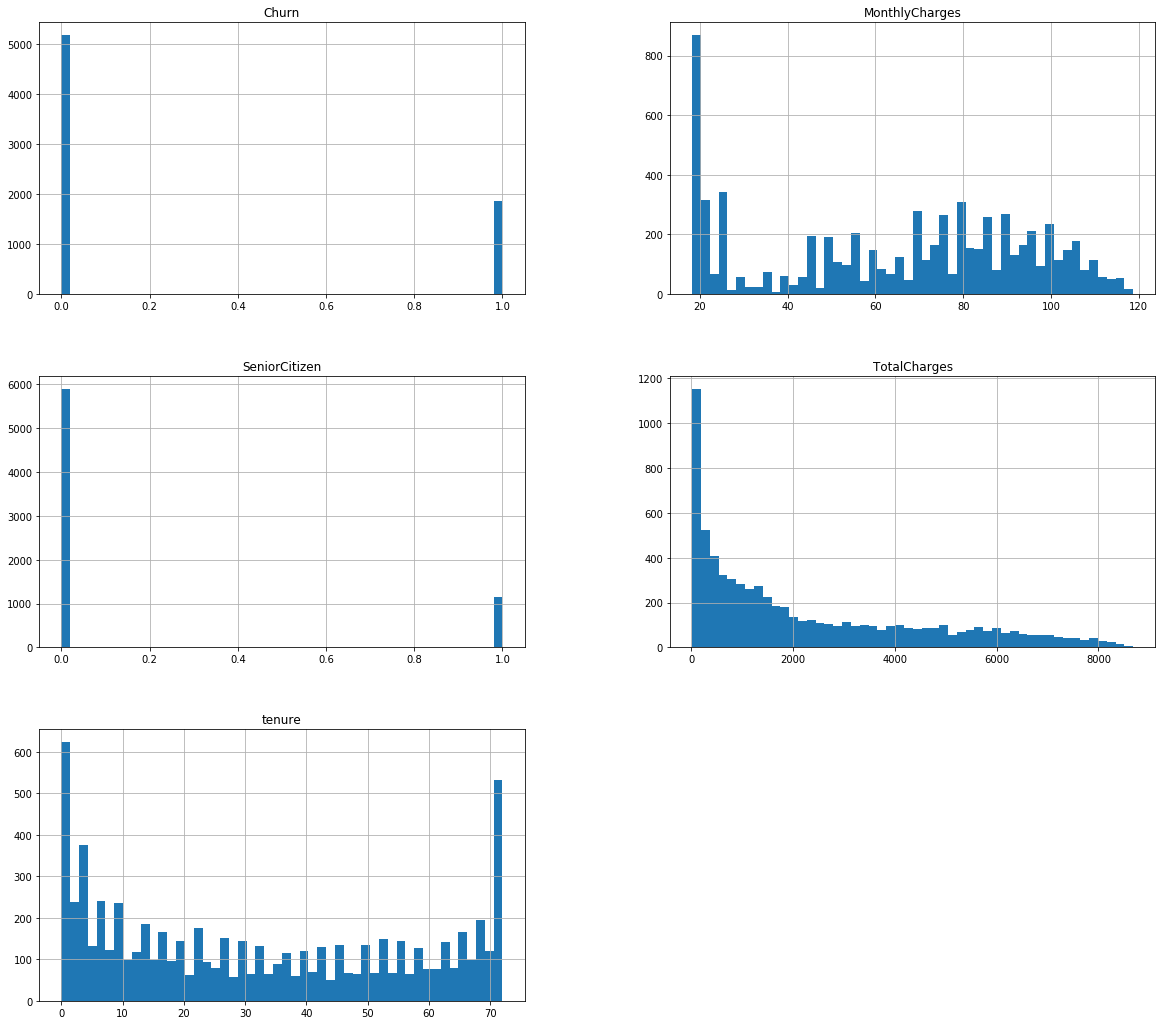

In [15]:
data.hist(bins=50,figsize=(20,18));

## Prepare the Data for Machine Learning Algorithms

In [146]:
X = data.drop(['customerID','Churn'],axis=1)
y = data['Churn']

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [148]:
feature_num=[]
for col in (X.columns):
    if (X[col].dtype == 'int64') or (X[col].dtype =='float64'):
        feature_num.append(col)

In [149]:
feature_cat=[]
for col in (X.columns):
    if X[col].dtype == 'object':
        feature_cat.append(col)

In [150]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', MinMaxScaler()),
    ])

In [151]:
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('encoder', OneHotEncoder()),
    ])

In [152]:
preprocess_pipeline = ColumnTransformer(transformers=[
        ("num", num_pipeline, feature_num),
        ("cat", cat_pipeline, feature_cat),
    ])

In [173]:
full_pipeline = Pipeline([
    ('preprocess',preprocess_pipeline),
    ('clf',GradientBoostingClassifier())
])

In [174]:
full_pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                               

In [175]:
y_pred = full_pipeline.predict(X_test)

In [176]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1038
           1       0.64      0.52      0.57       371

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [177]:
confusion_matrix(y_test,y_pred)

array([[929, 109],
       [178, 193]], dtype=int64)

## Grid Search

In [29]:
from sklearn.model_selection import GridSearchCV

In [41]:
param_grid = {'clf__n_estimators': [100, 300, 500], 'clf__max_features': ['log2', 'sqrt'], random_state=}

In [47]:
grid_search = GridSearchCV(full_pipeline, param_grid, cv=5,scoring='f1')

In [48]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                      

In [49]:
grid_search.best_params_

{'clf__max_features': 'sqrt',
 'clf__min_samples_leaf': 0.1,
 'clf__n_estimators': 400}

In [50]:
grid_search.best_estimator_

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                               

In [51]:
print(grid_search.best_score_)

0.12557589474916903


In [53]:
cvres = grid_search.cv_results_

In [56]:
for f1_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(f1_score, params)

0.0 {'clf__max_features': 'log2', 'clf__min_samples_leaf': 0.1, 'clf__n_estimators': 300}
0.0 {'clf__max_features': 'log2', 'clf__min_samples_leaf': 0.1, 'clf__n_estimators': 400}
0.0 {'clf__max_features': 'log2', 'clf__min_samples_leaf': 0.1, 'clf__n_estimators': 500}
0.0 {'clf__max_features': 'log2', 'clf__min_samples_leaf': 0.2, 'clf__n_estimators': 300}
0.0 {'clf__max_features': 'log2', 'clf__min_samples_leaf': 0.2, 'clf__n_estimators': 400}
0.0 {'clf__max_features': 'log2', 'clf__min_samples_leaf': 0.2, 'clf__n_estimators': 500}
0.12303462055785737 {'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 0.1, 'clf__n_estimators': 300}
0.12557589474916903 {'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 0.1, 'clf__n_estimators': 400}
0.11604606797255368 {'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 0.1, 'clf__n_estimators': 500}
0.0 {'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 0.2, 'clf__n_estimators': 300}
0.0 {'clf__max_features': 'sqrt', 'clf__min_samples_